In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

 ## Logistic Regression

In [11]:
data = pd.read_csv("/content/VLagun_Phys_Years3.csv")
X = data["Windspeedinsitu"].values.reshape(-1,1)
y = data["Years"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

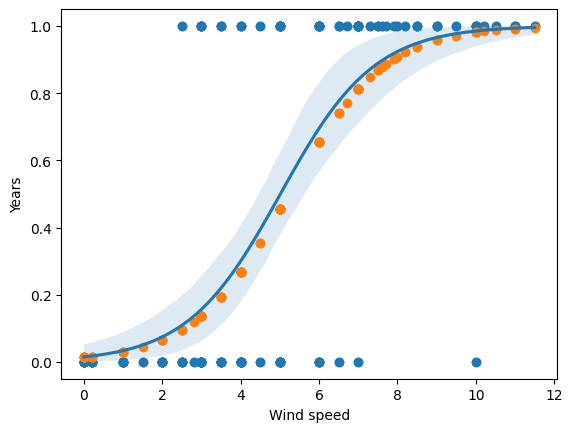

In [12]:
LogR = LogisticRegression()
LogR.fit(X_train, np.ravel(y_train.astype(int)))

sns.regplot(x='Windspeedinsitu', y='Years', data=data, logistic=True)

plt.scatter(X, y)
plt.xlabel("Wind speed")
plt.ylabel("Years")

plt.scatter(X, LogR.predict_proba(X)[:,1])

plt.show()

In [13]:
print("Model score on training data:", round(LogR.score(X_train, np.ravel(y_train.astype(int))),4))
print("Model score on test data:", round(LogR.score(X_test, np.ravel(y_test.astype(int))),4))

Model score on training data: 0.7976
Model score on test data: 0.8611


 ## Support Vector Machines

In [14]:
X = data[['Windspeedinsitu', 'temp.']].values
y = data['Years'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracies = {}

In [16]:
print("\nSVM Model Accuracies:")
print("-" * 40)

for kernel in kernels:

    svm_model = svm.SVC(kernel=kernel, random_state=7)
    svm_model.fit(X_train_scaled, y_train)

    y_pred = svm_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy

    print(f"{kernel.capitalize()} kernel accuracy: {accuracy:.4f}")

best_kernel = max(accuracies, key=accuracies.get)
print(f"\nBest kernel: {best_kernel} with accuracy: {accuracies[best_kernel]:.4f}")


SVM Model Accuracies:
----------------------------------------
Linear kernel accuracy: 0.8333
Rbf kernel accuracy: 0.8611
Poly kernel accuracy: 0.7500
Sigmoid kernel accuracy: 0.6944

Best kernel: rbf with accuracy: 0.8611


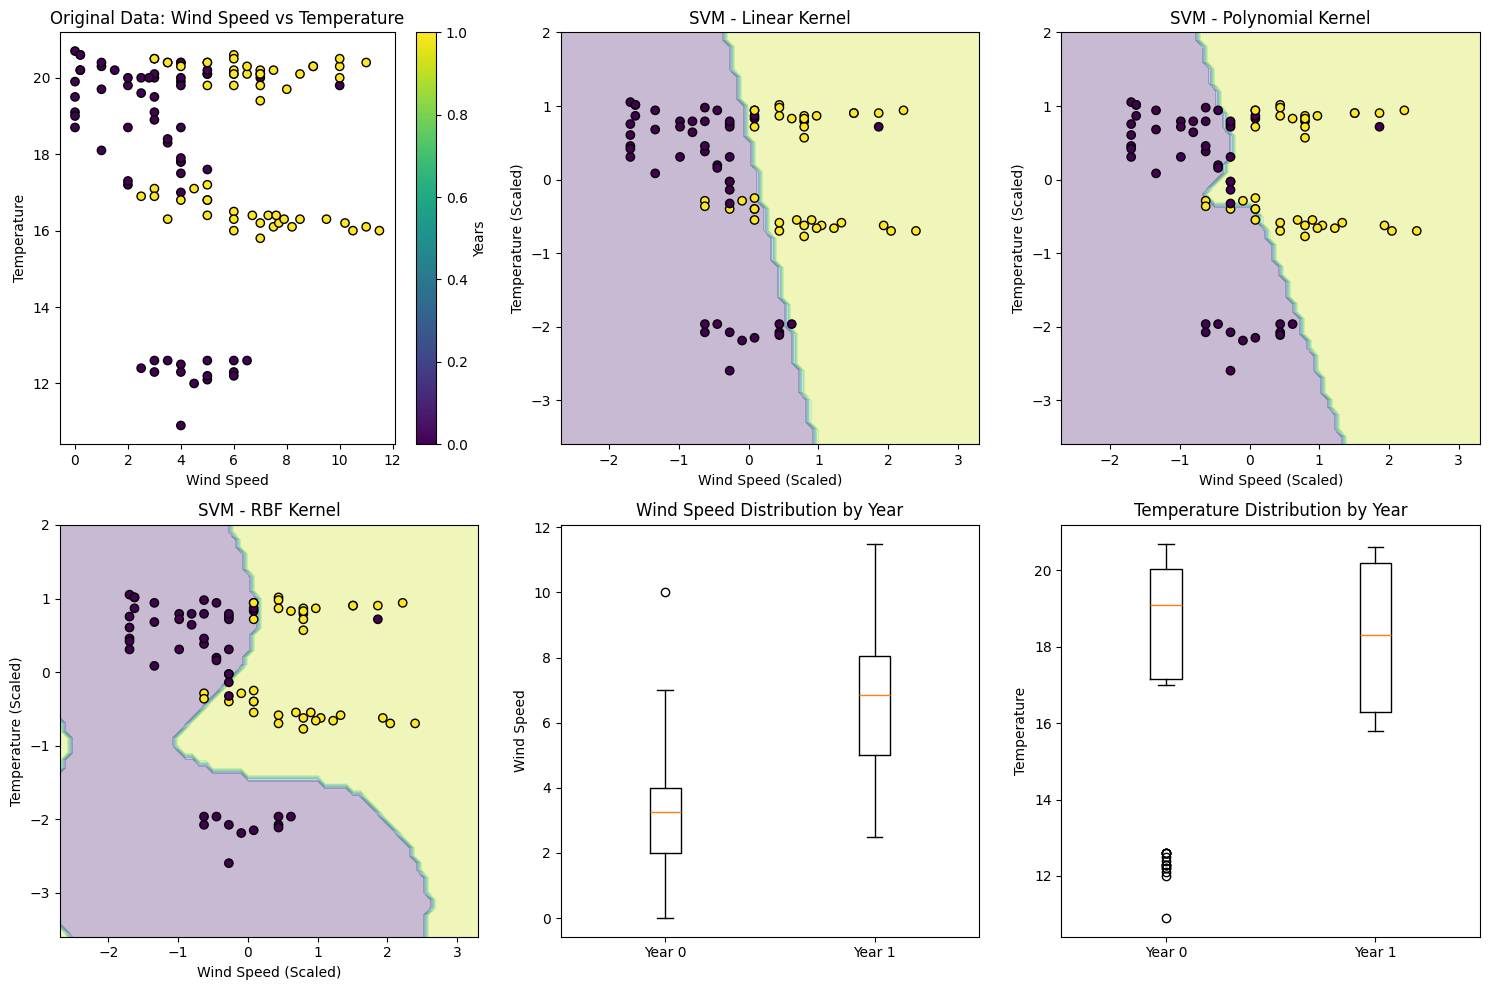

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Original Data: Wind Speed vs Temperature')
plt.colorbar(scatter, label='Years')

def plot_decision_boundary(X, y, kernel, subplot_pos, title):
    plt.subplot(2, 3, subplot_pos)

    model = svm.SVC(kernel=kernel, random_state=7)
    model.fit(X, y)

    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
    plt.xlabel('Wind Speed (Scaled)')
    plt.ylabel('Temperature (Scaled)')
    plt.title(f'SVM - {title} Kernel')

plot_decision_boundary(X_train_scaled, y_train, 'linear', 2, 'Linear')
plot_decision_boundary(X_train_scaled, y_train, 'poly', 3, 'Polynomial')
plot_decision_boundary(X_train_scaled, y_train, 'rbf', 4, 'RBF')

plt.subplot(2, 3, 5)
plt.boxplot([X[y == val, 0] for val in np.unique(y)],
            tick_labels=[f'Year {int(val)}' for val in np.unique(y)])
plt.ylabel('Wind Speed')
plt.title('Wind Speed Distribution by Year')

plt.subplot(2, 3, 6)
plt.boxplot([X[y == val, 1] for val in np.unique(y)],
            tick_labels=[f'Year {int(val)}' for val in np.unique(y)])
plt.ylabel('Temperature')
plt.title('Temperature Distribution by Year')

plt.tight_layout()
plt.show()



In [18]:
print("\n" + "="*50)
print("DETAILED SVM ANALYSIS")
print("="*50)

best_svm = svm.SVC(kernel=best_kernel, random_state=7)
best_svm.fit(X_train_scaled, y_train)
y_pred_best = best_svm.predict(X_test_scaled)

print(f"\nClassification Report for {best_kernel} kernel:")
print(classification_report(y_test, y_pred_best))

if best_kernel == 'linear':
    coefficients = best_svm.coef_[0]
    feature_names = ['Wind Speed', 'Temperature']

    plt.figure(figsize=(8, 5))
    plt.bar(feature_names, np.abs(coefficients))
    plt.title('Feature Importance (Linear SVM)')
    plt.ylabel('Absolute Coefficient Value')
    plt.show()

    print("\nLinear SVM Coefficients:")
    for name, coef in zip(feature_names, coefficients):
        print(f"{name}: {coef:.4f}")

print(f"\nNumber of support vectors: {len(best_svm.support_)}")
print(f"Support vectors for each class: {best_svm.n_support_}")

print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)
print(f"Wind Speed range: {X[:, 0].min():.2f} to {X[:, 0].max():.2f}")
print(f"Temperature range: {X[:, 1].min():.2f} to {X[:, 1].max():.2f}")
print(f"Years distribution: {dict(zip(*np.unique(y, return_counts=True)))}")


DETAILED SVM ANALYSIS

Classification Report for rbf kernel:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.94      0.79      0.86        19

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36


Number of support vectors: 36
Support vectors for each class: [18 18]

DATA EXPLORATION
Wind Speed range: 0.00 to 11.50
Temperature range: 10.90 to 20.70
Years distribution: {np.int64(0): np.int64(64), np.int64(1): np.int64(56)}


 ## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [20]:
plt.style.use('default')
sns.set()

In [21]:
nb_models = {
    'Gaussian': GaussianNB(),
    'Multinomial': MultinomialNB(),
    'Bernoulli': BernoulliNB()
}

In [22]:
accuracies = {}
predictions = {}

print("\nNaive Bayes Model Accuracies:")
print("-" * 45)

for name, model in nb_models.items():
    try:
        if name == 'Gaussian':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            X_train_pos = X_train - X_train.min() + 1
            X_test_pos = X_test - X_test.min() + 1

            if name == 'Bernoulli':
                X_train_binary = (X_train_pos > np.median(X_train_pos, axis=0)).astype(int)
                X_test_binary = (X_test_pos > np.median(X_test_pos, axis=0)).astype(int)
                model.fit(X_train_binary, y_train)
                y_pred = model.predict(X_test_binary)
            else:
                model.fit(X_train_pos, y_train)
                y_pred = model.predict(X_test_pos)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        predictions[name] = y_pred

        print(f"{name} Naive Bayes accuracy: {accuracy:.4f}")

    except Exception as e:
        print(f"Error with {name} Naive Bayes: {e}")
        accuracies[name] = 0.0

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Naive Bayes model: {best_model} with accuracy: {accuracies[best_model]:.4f}")


Naive Bayes Model Accuracies:
---------------------------------------------
Gaussian Naive Bayes accuracy: 0.8333
Multinomial Naive Bayes accuracy: 0.7222
Bernoulli Naive Bayes accuracy: 0.7500

Best Naive Bayes model: Gaussian with accuracy: 0.8333


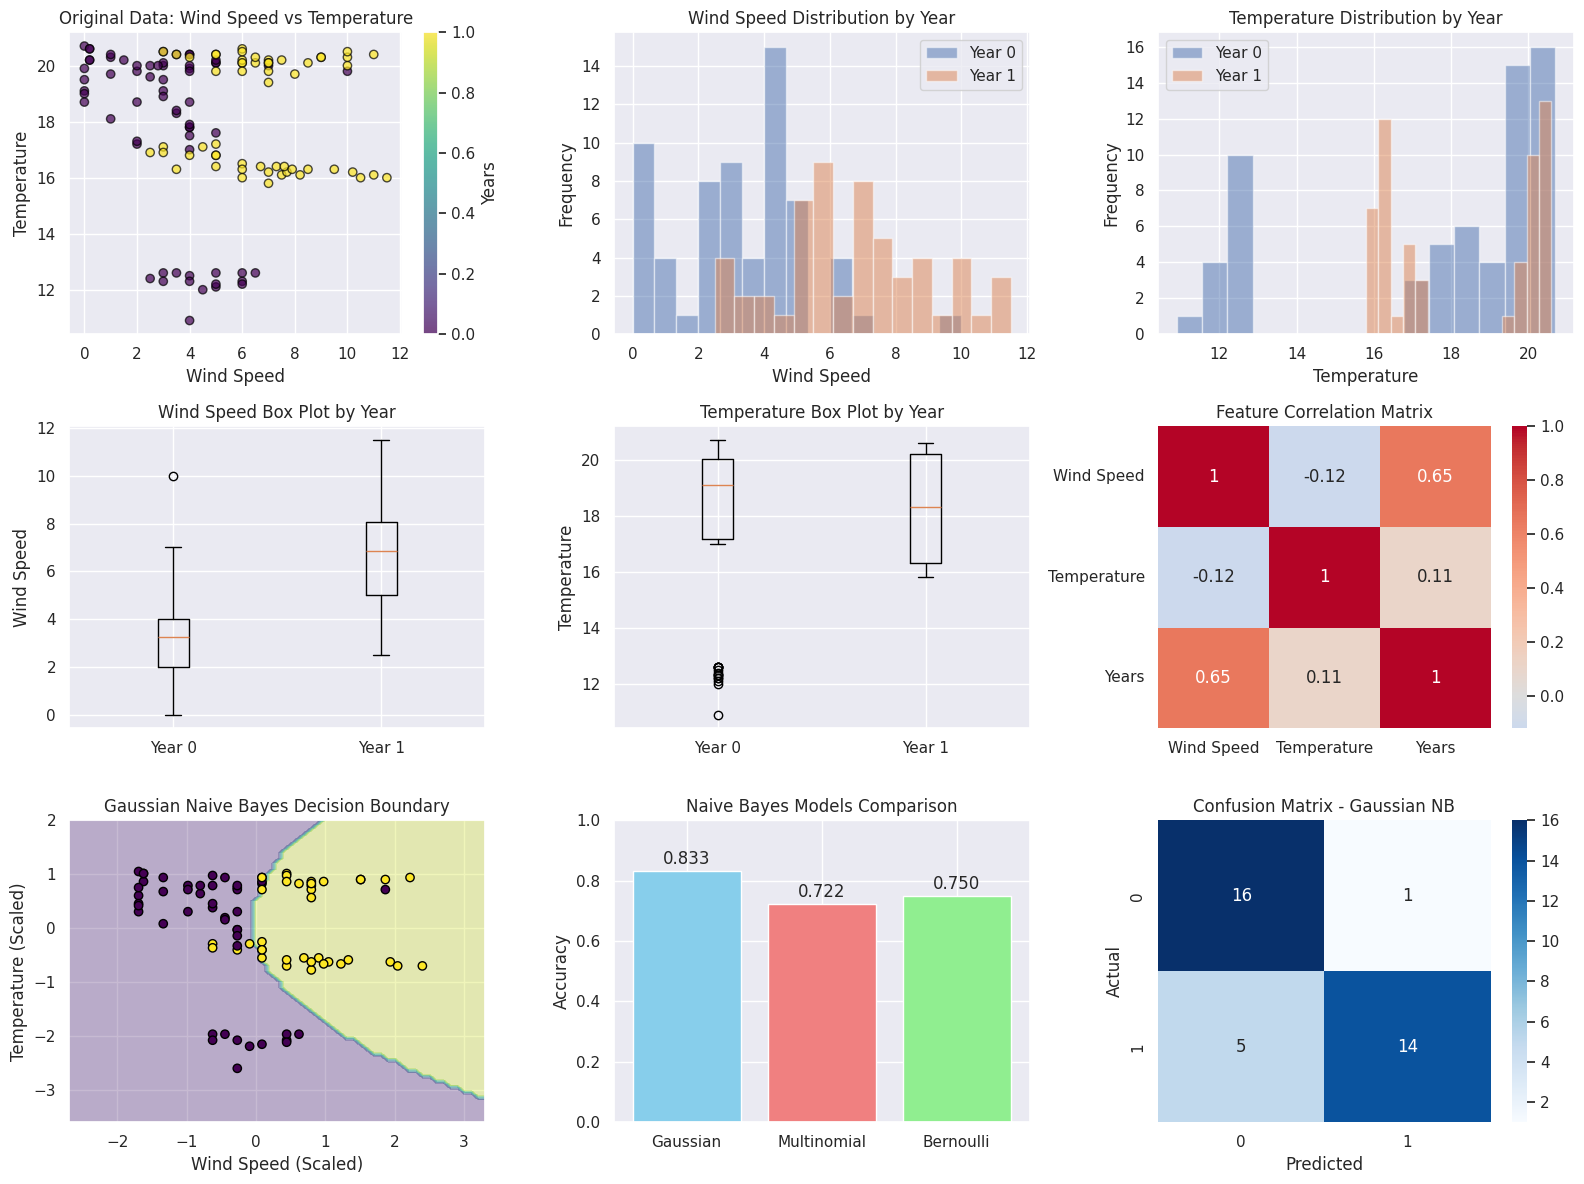

In [23]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black', alpha=0.7)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Original Data: Wind Speed vs Temperature')
plt.colorbar(scatter, label='Years')

plt.subplot(3, 3, 2)
for year in np.unique(y):
    plt.hist(X[y == year, 0], alpha=0.5, label=f'Year {int(year)}', bins=15)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution by Year')
plt.legend()

plt.subplot(3, 3, 3)
for year in np.unique(y):
    plt.hist(X[y == year, 1], alpha=0.5, label=f'Year {int(year)}', bins=15)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Year')
plt.legend()

plt.subplot(3, 3, 4)
years_unique = np.unique(y)
wind_data = [X[y == year, 0] for year in years_unique]
plt.boxplot(wind_data, tick_labels=[f'Year {int(year)}' for year in years_unique])
plt.ylabel('Wind Speed')
plt.title('Wind Speed Box Plot by Year')

plt.subplot(3, 3, 5)
temp_data = [X[y == year, 1] for year in years_unique]
plt.boxplot(temp_data, tick_labels=[f'Year {int(year)}' for year in years_unique])
plt.ylabel('Temperature')
plt.title('Temperature Box Plot by Year')

plt.subplot(3, 3, 6)
corr_data = np.column_stack([X, y])
corr_df = pd.DataFrame(corr_data, columns=['Wind Speed', 'Temperature', 'Years'])
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

plt.subplot(3, 3, 7)
h = 0.1
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

nb_viz = GaussianNB()
nb_viz.fit(X_train_scaled, y_train)
Z = nb_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train,
                     cmap='viridis', edgecolors='black')
plt.xlabel('Wind Speed (Scaled)')
plt.ylabel('Temperature (Scaled)')
plt.title('Gaussian Naive Bayes Decision Boundary')

plt.subplot(3, 3, 8)
models = list(accuracies.keys())
scores = list(accuracies.values())
bars = plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Models Comparison')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{scores[i]:.3f}', ha='center', va='bottom')

plt.subplot(3, 3, 9)
if best_model in predictions:
    cm = confusion_matrix(y_test, predictions[best_model])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {best_model} NB')

plt.tight_layout()
plt.show()

In [24]:
print("\n" + "="*60)
print("DETAILED NAIVE BAYES ANALYSIS")
print("="*60)

best_nb_model = nb_models[best_model]
if best_model == 'Gaussian':
    best_nb_model.fit(X_train_scaled, y_train)
    y_pred_best = best_nb_model.predict(X_test_scaled)
    X_analysis = X_train_scaled
else:
    if best_model == 'Bernoulli':
        X_train_processed = (X_train_pos > np.median(X_train_pos, axis=0)).astype(int)
        X_test_processed = (X_test_pos > np.median(X_test_pos, axis=0)).astype(int)
    else:
        X_train_processed = X_train_pos
        X_test_processed = X_test_pos

    best_nb_model.fit(X_train_processed, y_train)
    y_pred_best = best_nb_model.predict(X_test_processed)
    X_analysis = X_train_processed

print(f"\nClassification Report for {best_model} Naive Bayes:")
print(classification_report(y_test, y_pred_best))

if best_model == 'Gaussian':
    print(f"\nGaussian Naive Bayes Parameters:")
    print(f"Classes: {best_nb_model.classes_}")
    print(f"Class priors: {best_nb_model.class_prior_}")
    print(f"Feature means by class:")
    for i, cls in enumerate(best_nb_model.classes_):
        print(f"  Class {cls}: Wind Speed = {best_nb_model.theta_[i][0]:.3f}, Temperature = {best_nb_model.theta_[i][1]:.3f}")
    print(f"Feature variances by class:")
    for i, cls in enumerate(best_nb_model.classes_):
        print(f"  Class {cls}: Wind Speed = {best_nb_model.var_[i][0]:.3f}, Temperature = {best_nb_model.var_[i][1]:.3f}")

print(f"\nDataset Statistics:")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Feature 1 (Wind Speed) range: {X[:, 0].min():.2f} to {X[:, 0].max():.2f}")
print(f"Feature 2 (Temperature) range: {X[:, 1].min():.2f} to {X[:, 1].max():.2f}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

print(f"\nModel Performance Summary:")
for model, acc in accuracies.items():
    print(f"{model} Naive Bayes: {acc:.4f}")


DETAILED NAIVE BAYES ANALYSIS

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.93      0.74      0.82        19

    accuracy                           0.83        36
   macro avg       0.85      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36


Gaussian Naive Bayes Parameters:
Classes: [0 1]
Class priors: [0.55952381 0.44047619]
Feature means by class:
  Class 0: Wind Speed = -0.578, Temperature = -0.054
  Class 1: Wind Speed = 0.734, Temperature = 0.068
Feature variances by class:
  Class 0: Wind Speed = 0.597, Temperature = 1.388
  Class 1: Wind Speed = 0.548, Temperature = 0.498

Dataset Statistics:
Total samples: 120
Training samples: 84
Test samples: 36
Feature 1 (Wind Speed) range: 0.00 to 11.50
Feature 2 (Temperature) range: 10.90 to 20.70
Class distribution: {np.int64(0): np.int64(64), np.int64(1): np.int64(56)}

Mode

 ## K-nearest neighbours

In [25]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [26]:
data = pd.read_csv("/content/VLagun_Phys_Years3.csv")
X = data[['Windspeedinsitu', 'DOC']].values
y = data['Years'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
k_range = range(1, 21)
k_scores = []
k_train_scores = []

print("\nTesting different K values:")
print("-" * 40)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_score = knn.score(X_train_scaled, y_train)

    k_scores.append(test_score)
    k_train_scores.append(train_score)

    if k <= 10:
        print(f"K={k}: Train Accuracy={train_score:.4f}, Test Accuracy={test_score:.4f}")

optimal_k = k_range[np.argmax(k_scores)]
print(f"\nOptimal K value: {optimal_k} with test accuracy: {max(k_scores):.4f}")

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

y_pred = knn_final.predict(X_test_scaled)
y_pred_proba = knn_final.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final KNN accuracy with K={optimal_k}: {final_accuracy:.4f}")

print("\nGenerating interactive visualizations...")


Testing different K values:
----------------------------------------
K=1: Train Accuracy=1.0000, Test Accuracy=0.8333
K=2: Train Accuracy=0.9405, Test Accuracy=0.8333
K=3: Train Accuracy=0.9167, Test Accuracy=0.8056
K=4: Train Accuracy=0.9286, Test Accuracy=0.8056
K=5: Train Accuracy=0.9286, Test Accuracy=0.8333
K=6: Train Accuracy=0.9286, Test Accuracy=0.8611
K=7: Train Accuracy=0.9405, Test Accuracy=0.8056
K=8: Train Accuracy=0.9286, Test Accuracy=0.8611
K=9: Train Accuracy=0.9286, Test Accuracy=0.8611
K=10: Train Accuracy=0.9286, Test Accuracy=0.8611

Optimal K value: 6 with test accuracy: 0.8611
Final KNN accuracy with K=6: 0.8611

Generating interactive visualizations...


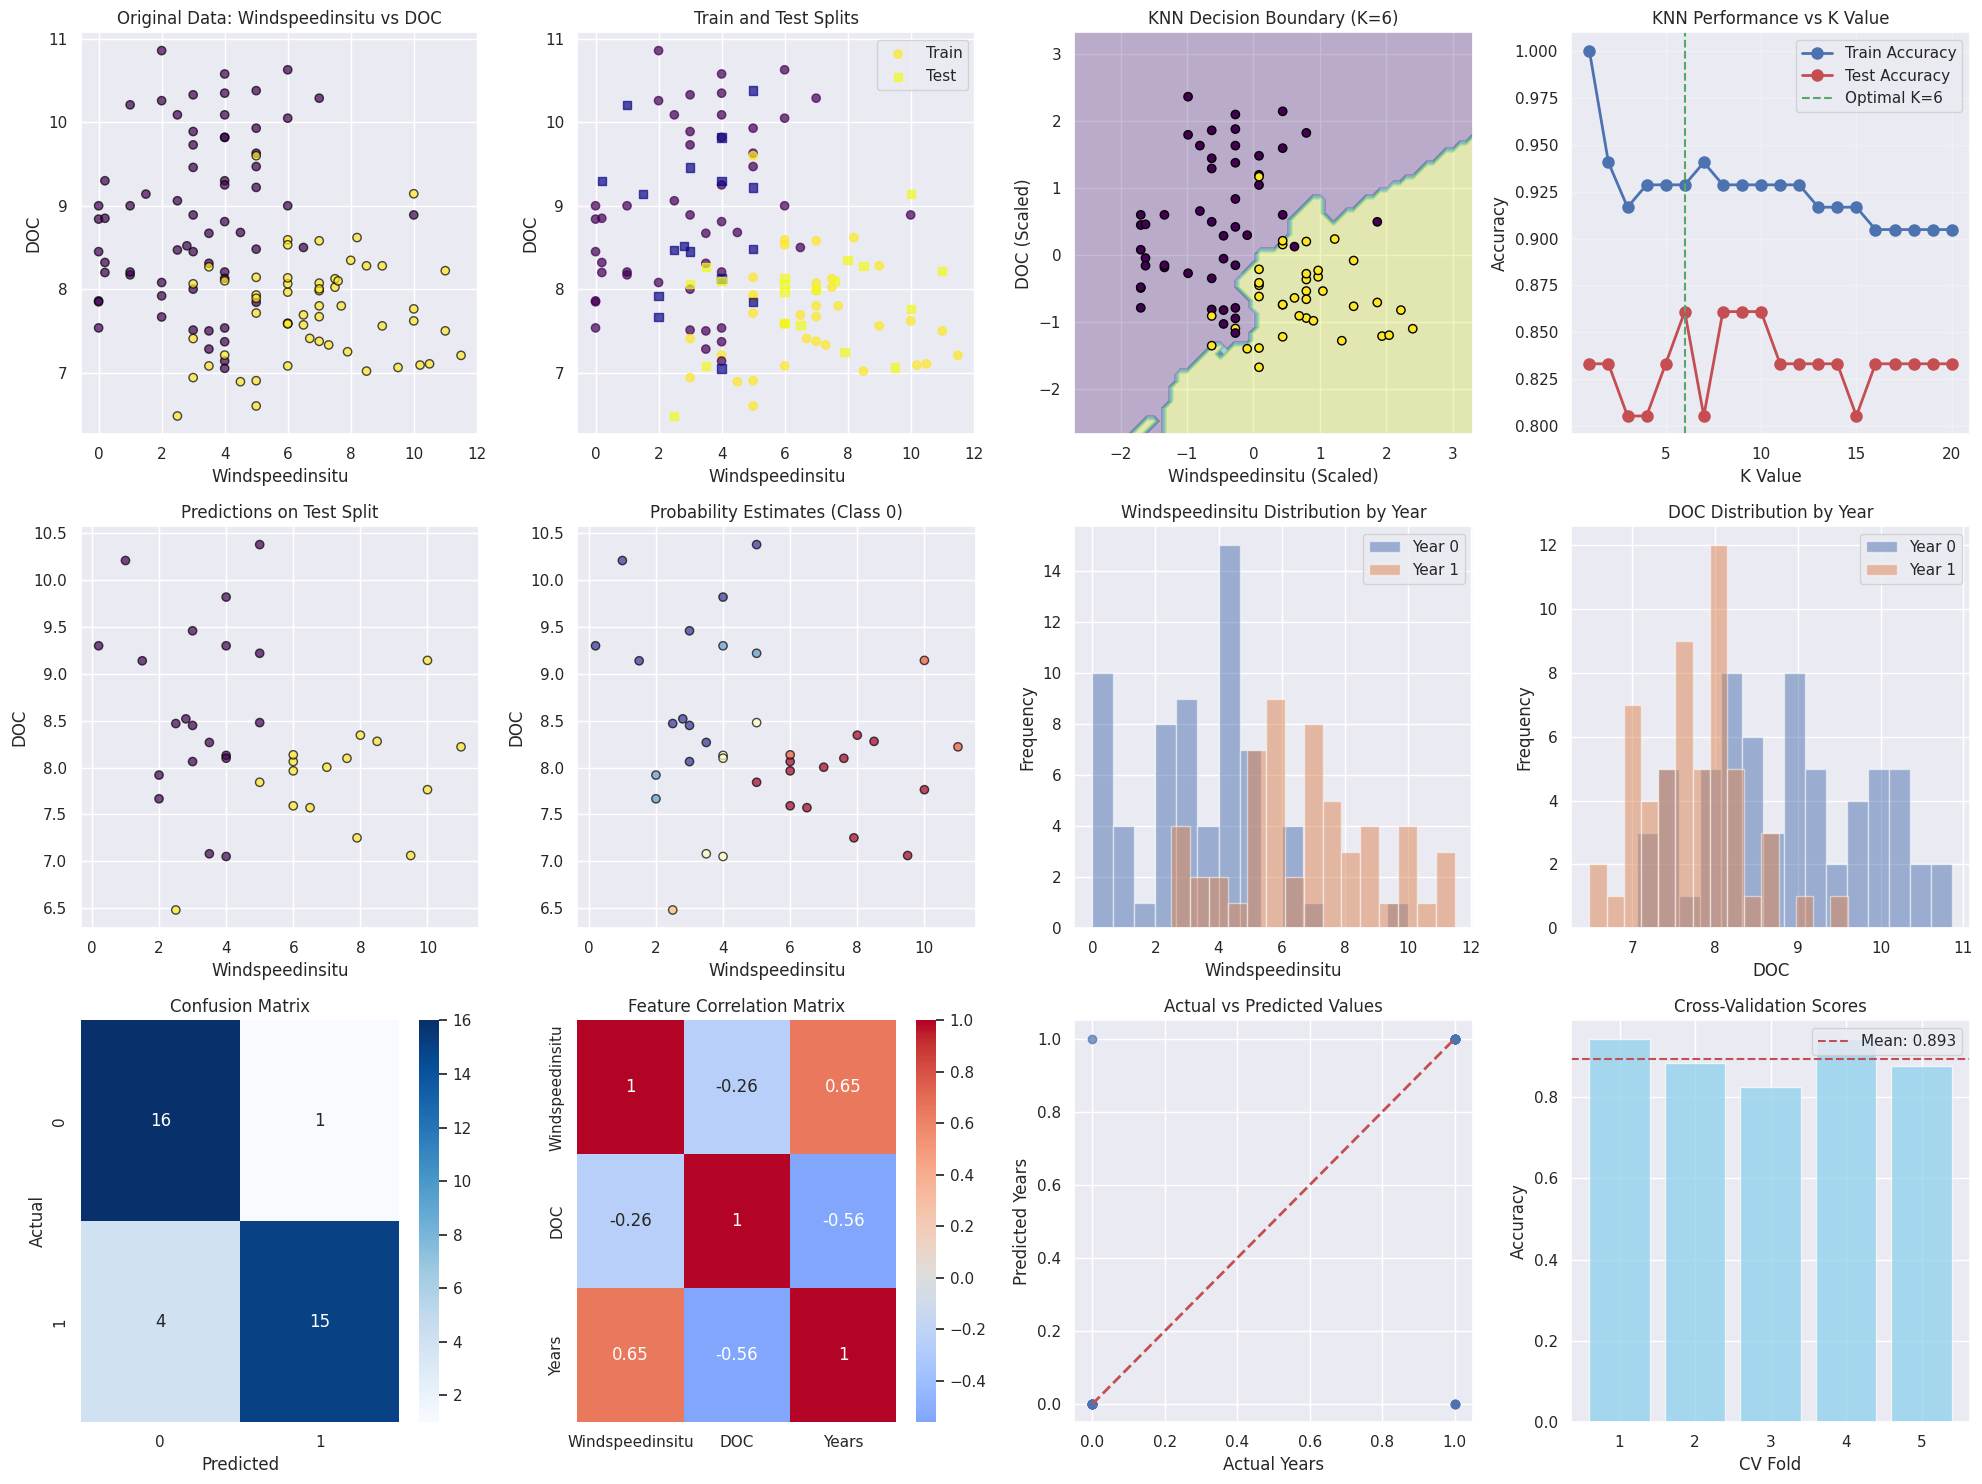

In [28]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='black')
axes[0, 0].set_xlabel('Windspeedinsitu')
axes[0, 0].set_ylabel('DOC')
axes[0, 0].set_title('Original Data: Windspeedinsitu vs DOC')

axes[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7, marker='o', label='Train')
axes[0, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='plasma', alpha=0.7, marker='s', label='Test')
axes[0, 1].set_xlabel('Windspeedinsitu')
axes[0, 1].set_ylabel('DOC')
axes[0, 1].set_title('Train and Test Splits')
axes[0, 1].legend()

def plot_decision_boundary(X, y, k, ax, title):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
    ax.set_xlabel('Windspeedinsitu (Scaled)')
    ax.set_ylabel('DOC (Scaled)')
    ax.set_title(title)

plot_decision_boundary(X_train_scaled, y_train, optimal_k, axes[0, 2], f'KNN Decision Boundary (K={optimal_k})')

axes[0, 3].plot(k_range, k_train_scores, 'bo-', label='Train Accuracy', linewidth=2, markersize=8)
axes[0, 3].plot(k_range, k_scores, 'ro-', label='Test Accuracy', linewidth=2, markersize=8)
axes[0, 3].axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal K={optimal_k}')
axes[0, 3].set_xlabel('K Value')
axes[0, 3].set_ylabel('Accuracy')
axes[0, 3].set_title('KNN Performance vs K Value')
axes[0, 3].legend()
axes[0, 3].grid(True, alpha=0.3)

axes[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7, edgecolors='black')
axes[1, 0].set_xlabel('Windspeedinsitu')
axes[1, 0].set_ylabel('DOC')
axes[1, 0].set_title('Predictions on Test Split')

if y_pred_proba.shape[1] > 1:
    axes[1, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_proba[:, 0], cmap='RdYlBu', alpha=0.7, edgecolors='black')
    axes[1, 1].set_xlabel('Windspeedinsitu')
    axes[1, 1].set_ylabel('DOC')
    axes[1, 1].set_title('Probability Estimates (Class 0)')

for i, year in enumerate(np.unique(y)):
    axes[1, 2].hist(X[y == year, 0], alpha=0.5, label=f'Year {int(year)}', bins=15)
axes[1, 2].set_xlabel('Windspeedinsitu')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Windspeedinsitu Distribution by Year')
axes[1, 2].legend()

for i, year in enumerate(np.unique(y)):
    axes[1, 3].hist(X[y == year, 1], alpha=0.5, label=f'Year {int(year)}', bins=15)
axes[1, 3].set_xlabel('DOC')
axes[1, 3].set_ylabel('Frequency')
axes[1, 3].set_title('DOC Distribution by Year')
axes[1, 3].legend()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2, 0])
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Actual')
axes[2, 0].set_title('Confusion Matrix')

corr_data = np.column_stack([X, y])
corr_df = pd.DataFrame(corr_data, columns=['Windspeedinsitu', 'DOC', 'Years'])
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0, ax=axes[2, 1])
axes[2, 1].set_title('Feature Correlation Matrix')

axes[2, 2].scatter(y_test, y_pred, alpha=0.7)
axes[2, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2, 2].set_xlabel('Actual Years')
axes[2, 2].set_ylabel('Predicted Years')
axes[2, 2].set_title('Actual vs Predicted Values')

cv_scores = cross_val_score(knn_final, X_train_scaled, y_train, cv=5)
axes[2, 3].bar(range(1, 6), cv_scores, alpha=0.7, color='skyblue')
axes[2, 3].axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
axes[2, 3].set_xlabel('CV Fold')
axes[2, 3].set_ylabel('Accuracy')
axes[2, 3].set_title('Cross-Validation Scores')
axes[2, 3].legend()

plt.tight_layout()
plt.show()

In [29]:
print("Creating interactive Plotly visualizations...")

fig_splits = go.Figure()

fig_splits.add_trace(go.Scatter(
    x=X_train[:, 0], y=X_train[:, 1],
    mode='markers',
    marker=dict(color=y_train, colorscale='Viridis', size=8, opacity=0.7, line=dict(width=1, color='black')),
    name='Training Data',
    text=[f'Year: {int(year)}' for year in y_train],
    hovertemplate='<b>Training Data</b><br>Windspeedinsitu: %{x}<br>DOC: %{y}<br>%{text}<extra></extra>'
))

fig_splits.add_trace(go.Scatter(
    x=X_test[:, 0], y=X_test[:, 1],
    mode='markers',
    marker=dict(color=y_test, colorscale='Plasma', size=10, opacity=0.8, symbol='square', line=dict(width=1, color='black')),
    name='Test Data',
    text=[f'Year: {int(year)}' for year in y_test],
    hovertemplate='<b>Test Data</b><br>Windspeedinsitu: %{x}<br>DOC: %{y}<br>%{text}<extra></extra>'
))

fig_splits.update_layout(
    title='Interactive KNN: Train and Test Splits',
    xaxis_title='Windspeedinsitu',
    yaxis_title='DOC',
    showlegend=True
)
fig_splits.show()

Creating interactive Plotly visualizations...


In [30]:
fig_pred = go.Figure()

fig_pred.add_trace(go.Scatter(
    x=X_test[:, 0], y=X_test[:, 1],
    mode='markers',
    marker=dict(color=y_pred, colorscale='Viridis', size=12, opacity=0.8, line=dict(width=2, color='black')),
    name='Predictions',
    text=[f'Actual: {int(actual)}, Predicted: {int(pred)}' for actual, pred in zip(y_test, y_pred)],
    hovertemplate='<b>KNN Predictions</b><br>Windspeedinsitu: %{x}<br>DOC: %{y}<br>%{text}<extra></extra>'
))

fig_pred.update_layout(
    title=f'Interactive KNN Predictions on Test Split (K={optimal_k})',
    xaxis_title='Windspeedinsitu',
    yaxis_title='DOC'
)
fig_pred.show()



In [31]:
if y_pred_proba.shape[1] > 1:
    n_classes = y_pred_proba.shape[1]
    fig_proba = make_subplots(
        rows=1, cols=min(n_classes, 3),
        subplot_titles=[f'Class {int(cls)} Probability' for cls in np.unique(y)[:3]]
    )

    for i, cls in enumerate(np.unique(y)[:3]):
        fig_proba.add_trace(
            go.Scatter(
                x=X_test[:, 0], y=X_test[:, 1],
                mode='markers',
                marker=dict(
                    color=y_pred_proba[:, i],
                    colorscale='RdYlBu',
                    size=10,
                    opacity=0.8,
                    colorbar=dict(title=f'Class {int(cls)} Probability'),
                    line=dict(width=1, color='black')
                ),
                name=f'Class {int(cls)}',
                text=[f'Prob: {prob:.3f}' for prob in y_pred_proba[:, i]],
                hovertemplate=f'<b>Class {int(cls)} Probability</b><br>Windspeedinsitu: %{{x}}<br>DOC: %{{y}}<br>%{{text}}<extra></extra>'
            ),
            row=1, col=i+1
        )

    fig_proba.update_layout(
        title='Interactive KNN: Probability Estimations',
        showlegend=False
    )
    fig_proba.show()

In [32]:
fig_k = go.Figure()

fig_k.add_trace(go.Scatter(
    x=list(k_range), y=k_train_scores,
    mode='lines+markers',
    name='Training Accuracy',
    line=dict(color='blue', width=3),
    marker=dict(size=8)
))

fig_k.add_trace(go.Scatter(
    x=list(k_range), y=k_scores,
    mode='lines+markers',
    name='Test Accuracy',
    line=dict(color='red', width=3),
    marker=dict(size=8)
))

fig_k.add_vline(x=optimal_k, line_dash="dash", line_color="green",
                annotation_text=f"Optimal K={optimal_k}")

fig_k.update_layout(
    title='Interactive KNN: K-Value Optimization',
    xaxis_title='K Value',
    yaxis_title='Accuracy',
    hovermode='x unified'
)
fig_k.show()

In [33]:
print("\n" + "="*60)
print("DETAILED KNN ANALYSIS")
print("="*60)

print(f"Optimal K value: {optimal_k}")
print(f"Final test accuracy: {final_accuracy:.4f}")
print(f"Cross-validation mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nFeature Statistics:")
print(f"Windspeedinsitu range: {X[:, 0].min():.2f} to {X[:, 0].max():.2f}")
print(f"DOC range: {X[:, 1].min():.2f} to {X[:, 1].max():.2f}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

print(f"\nModel Performance at different K values:")
for i, k in enumerate(range(1, 11)):
    print(f"K={k}: Train={k_train_scores[i]:.4f}, Test={k_scores[i]:.4f}")

distances, indices = knn_final.kneighbors(X_test_scaled)
print(f"\nNearest Neighbor Analysis:")
print(f"Average distance to {optimal_k} nearest neighbors: {np.mean(distances):.4f}")
print(f"Standard deviation of distances: {np.std(distances):.4f}")

print(f"\nDataset Summary:")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Features used: Windspeedinsitu, DOC")
print(f"Target variable: Years")


DETAILED KNN ANALYSIS
Optimal K value: 6
Final test accuracy: 0.8611
Cross-validation mean: 0.8926 (+/- 0.0890)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.94      0.79      0.86        19

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36


Feature Statistics:
Windspeedinsitu range: 0.00 to 11.50
DOC range: 6.48 to 10.86
Class distribution: {np.int64(0): np.int64(64), np.int64(1): np.int64(56)}

Model Performance at different K values:
K=1: Train=1.0000, Test=0.8333
K=2: Train=0.9405, Test=0.8333
K=3: Train=0.9167, Test=0.8056
K=4: Train=0.9286, Test=0.8056
K=5: Train=0.9286, Test=0.8333
K=6: Train=0.9286, Test=0.8611
K=7: Train=0.9405, Test=0.8056
K=8: Train=0.9286, Test=0.8611
K=9: Train=0.9286, Test=0.8611
K=10: Train=0.9286, Test=0.8611

Nearest Neighbor Analysi

 ## PCA


In [34]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
data = pd.read_csv("wine.csv")

print("Dataset shape:", data.shape)
print("Dataset columns:", data.columns.tolist())
print("\nFirst few rows:")
print(data.head())
print("\nDataset info:")
print(data.info())

if 'class' in data.columns or 'target' in data.columns:
    target_col = 'class' if 'class' in data.columns else 'target'
    y = data[target_col].values
    X = data.drop(target_col, axis=1).values
else:
    y = data.iloc[:, 0].values
    X = data.iloc[:, 1:].values

feature_names = data.columns[1:].tolist() if 'class' not in data.columns else data.drop('class', axis=1).columns.tolist()

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Feature names: {feature_names}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Dataset shape: (178, 14)
Dataset columns: ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline', 'Wine']

First few rows:
   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  Wine  
0                  0.28     2.29       5.64  1.04  3.92     1065     1  
1                  0.26     1.28       4.38  1.05  3.40     1050     1  
2                  0.30     2.81       5.68  1.03  3.17     1185     1  
3                  0.24     2.18       7.80  0.86  3.45     1480     1  
4                  0.39     1.82       4

In [36]:
print(f"\nTrain shape for X variable: {X_train.shape}")
print(f"Test shape for X variable: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.90)
pca.fit(X_train_scaled)
print(f"\nVariance explained by the principal components (in decreasing order): {pca.explained_variance_ratio_}")

print(f"PCA singular values: {pca.singular_values_}")

X1_train = pca.transform(X_train_scaled)
X1_test = pca.transform(X_test_scaled)

print(f"Shape of transformed X: {X1_train.shape}")

print(f"\nNumber of components selected: {pca.n_components_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")
print(f"Cumulative variance explained: {np.cumsum(pca.explained_variance_ratio_)}")


Train shape for X variable: (124, 13)
Test shape for X variable: (54, 13)

Variance explained by the principal components (in decreasing order): [0.42861945 0.16801705 0.10687563 0.07040518 0.05708819 0.04666648
 0.03235362]
PCA singular values: [26.28563412 16.45732336 13.12568127 10.65331652  9.59302644  8.67331332
  7.22177491]
Shape of transformed X: (124, 7)

Number of components selected: 7
Total variance explained: 0.9100
Cumulative variance explained: [0.42861945 0.59663651 0.70351214 0.77391732 0.8310055  0.87767198
 0.9100256 ]


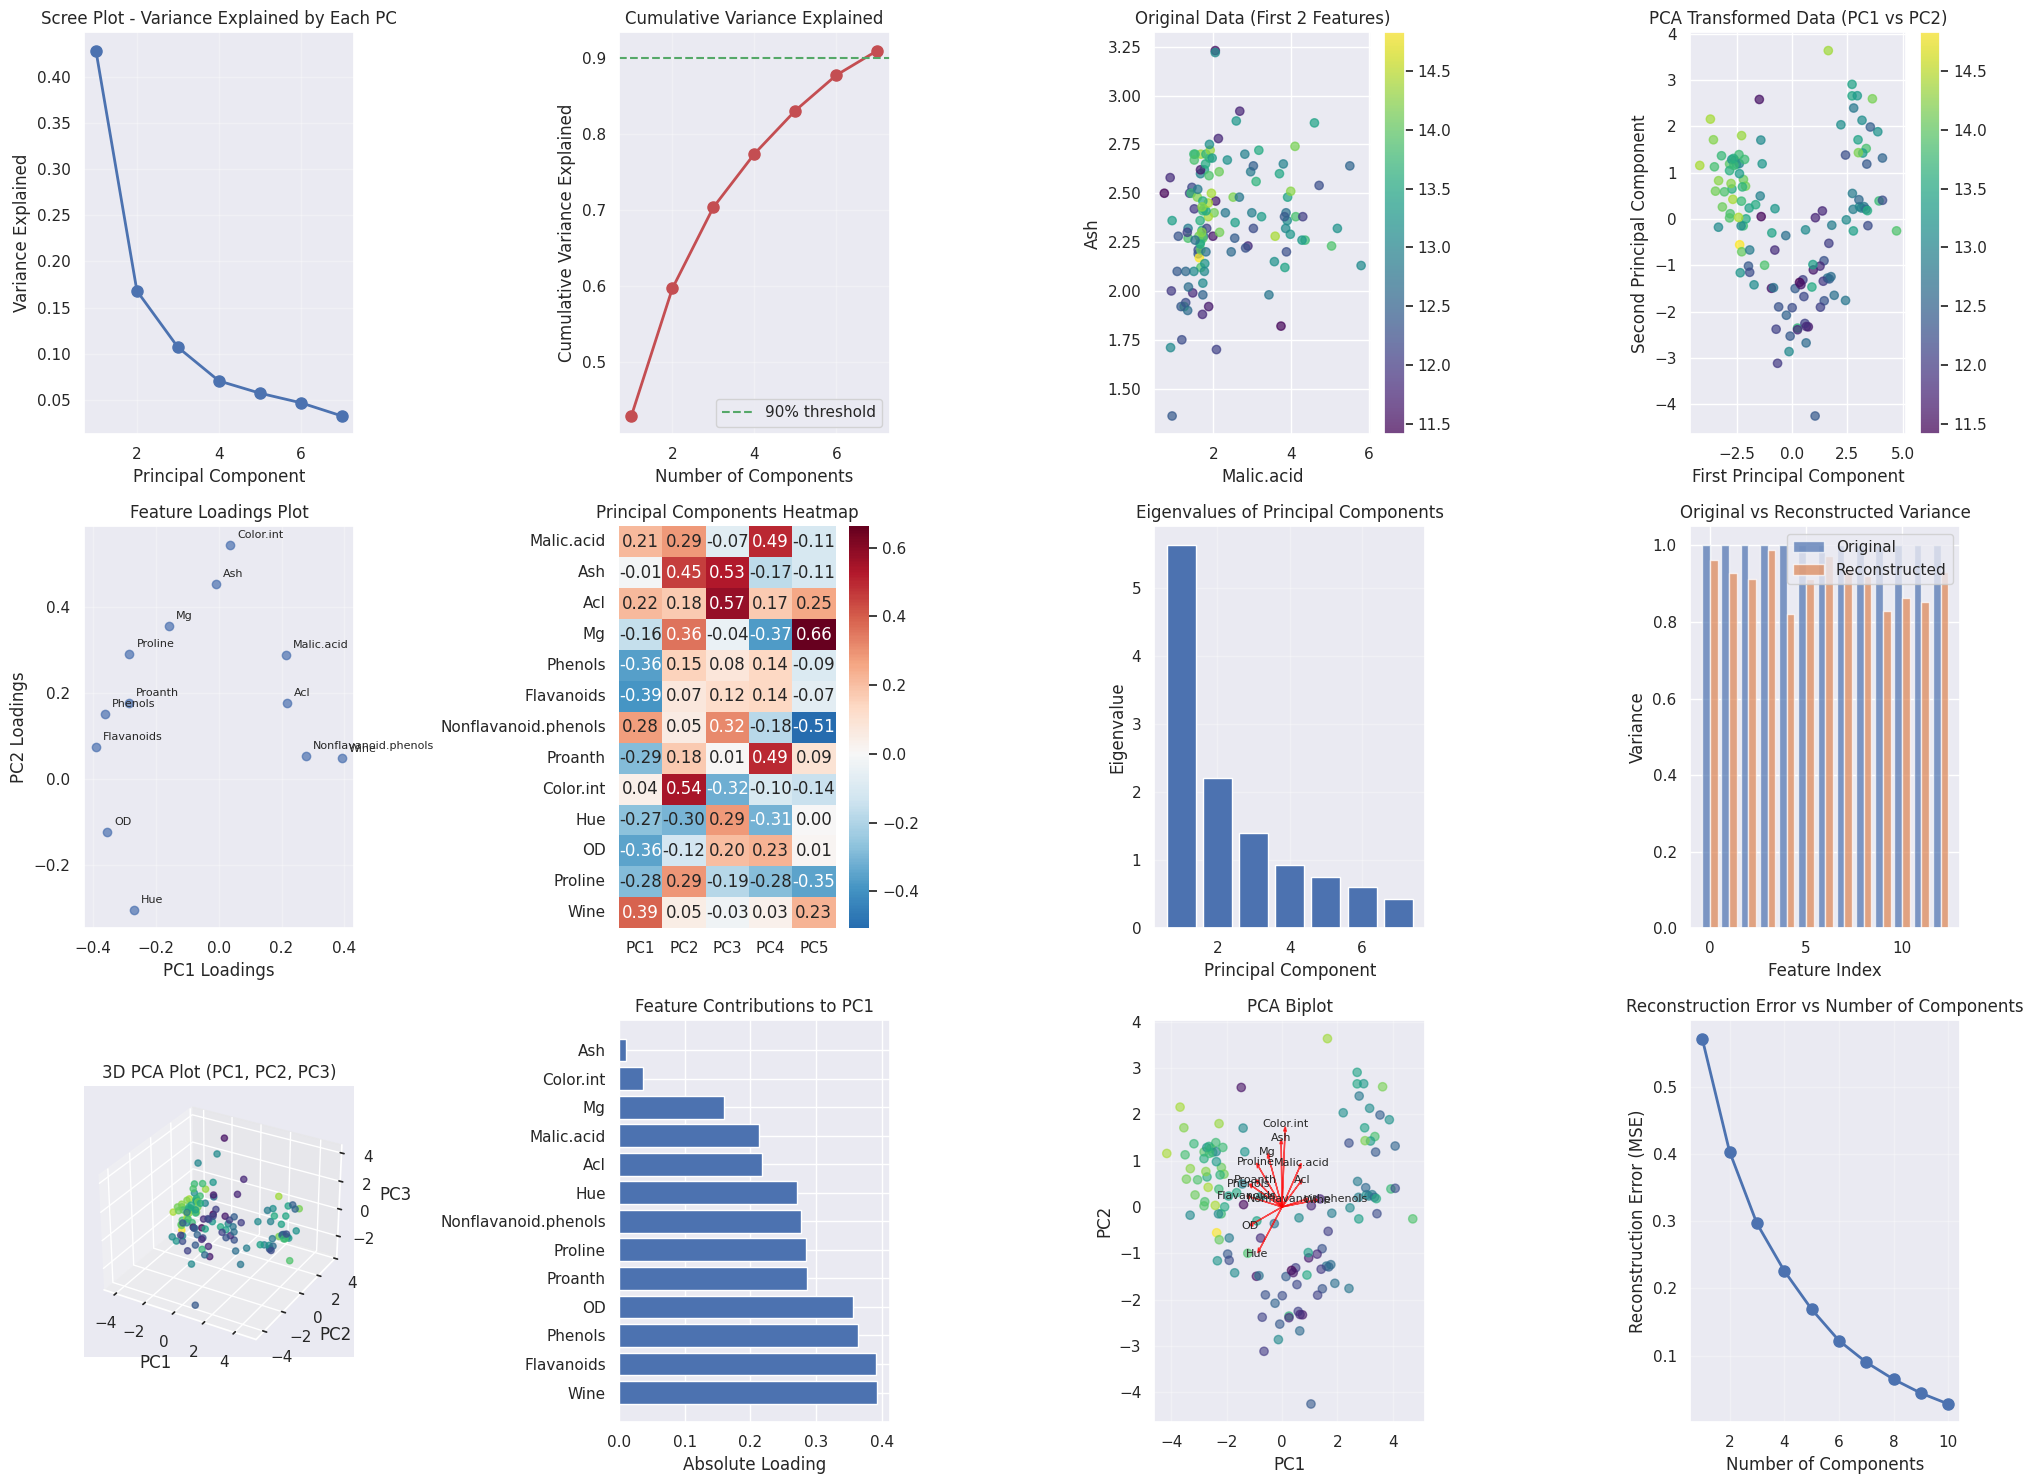

In [37]:
fig = plt.figure(figsize=(20, 15))

plt.subplot(3, 4, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each PC')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 2)
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-', linewidth=2, markersize=8)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 3)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel(feature_names[0] if len(feature_names) > 0 else 'Feature 1')
plt.ylabel(feature_names[1] if len(feature_names) > 1 else 'Feature 2')
plt.title('Original Data (First 2 Features)')
plt.colorbar(scatter)

plt.subplot(3, 4, 4)
scatter = plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformed Data (PC1 vs PC2)')
plt.colorbar(scatter)

plt.subplot(3, 4, 5)
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1] if pca.n_components_ > 1 else np.zeros_like(pc1_loadings)
plt.scatter(pc1_loadings, pc2_loadings, alpha=0.7)
for i, feature in enumerate(feature_names):
    plt.annotate(feature, (pc1_loadings[i], pc2_loadings[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Feature Loadings Plot')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 6)
n_components_show = min(5, pca.n_components_)
components_df = pd.DataFrame(
    pca.components_[:n_components_show].T,
    columns=[f'PC{i+1}' for i in range(n_components_show)],
    index=feature_names
)
sns.heatmap(components_df, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Principal Components Heatmap')

plt.subplot(3, 4, 7)
eigenvalues = pca.explained_variance_
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 8)
original_var = np.var(X_train_scaled, axis=0)
reconstructed = pca.inverse_transform(X1_train)
reconstructed_var = np.var(reconstructed, axis=0)
x_pos = np.arange(len(original_var))
plt.bar(x_pos - 0.2, original_var, 0.4, label='Original', alpha=0.7)
plt.bar(x_pos + 0.2, reconstructed_var, 0.4, label='Reconstructed', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Original vs Reconstructed Variance')
plt.legend()

if pca.n_components_ >= 3:
    ax = plt.subplot(3, 4, 9, projection='3d')
    scatter = ax.scatter(X1_train[:, 0], X1_train[:, 1], X1_train[:, 2],
                        c=y_train, cmap='viridis', alpha=0.7)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('3D PCA Plot (PC1, PC2, PC3)')
else:
    plt.subplot(3, 4, 9)
    plt.text(0.5, 0.5, 'Less than 3 components\navailable',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('3D Plot Not Available')

plt.subplot(3, 4, 10)
pc1_contributions = np.abs(pca.components_[0])
sorted_idx = np.argsort(pc1_contributions)[::-1]
plt.barh(range(len(pc1_contributions)), pc1_contributions[sorted_idx])
plt.yticks(range(len(pc1_contributions)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Absolute Loading')
plt.title('Feature Contributions to PC1')

plt.subplot(3, 4, 11)
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y_train, cmap='viridis', alpha=0.6)
scale_factor = 3
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, pca.components_[0, i] * scale_factor,
              pca.components_[1, i] * scale_factor if pca.n_components_ > 1 else 0,
              head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    plt.text(pca.components_[0, i] * scale_factor * 1.1,
             pca.components_[1, i] * scale_factor * 1.1 if pca.n_components_ > 1 else 0,
             feature, fontsize=8, ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 12)
n_components_range = range(1, min(10, X_train_scaled.shape[1]) + 1)
reconstruction_errors = []
for n in n_components_range:
    pca_temp = PCA(n_components=n)
    X_transformed = pca_temp.fit_transform(X_train_scaled)
    X_reconstructed = pca_temp.inverse_transform(X_transformed)
    error = np.mean((X_train_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(error)

plt.plot(n_components_range, reconstruction_errors, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs Number of Components')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [38]:
print("\nGenerating interactive Plotly visualizations...")

fig_2d = px.scatter(
    x=X1_train[:, 0],
    y=X1_train[:, 1],
    color=y_train,
    title="Interactive 2D PCA Plot",
    labels={'x': 'First Principal Component', 'y': 'Second Principal Component'},
    color_continuous_scale='viridis'
)
fig_2d.show()


Generating interactive Plotly visualizations...


In [39]:
if pca.n_components_ >= 3:
    fig_3d = px.scatter_3d(
        x=X1_train[:, 0],
        y=X1_train[:, 1],
        z=X1_train[:, 2],
        color=y_train,
        title="Interactive 3D PCA Plot",
        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
        color_continuous_scale='viridis'
    )
    fig_3d.show()

In [40]:
fig_var = px.bar(
    x=list(range(1, len(pca.explained_variance_ratio_) + 1)),
    y=pca.explained_variance_ratio_,
    title="Interactive Variance Explained by Each Component",
    labels={'x': 'Principal Component', 'y': 'Variance Explained'}
)
fig_var.show()

In [41]:
fig_heatmap = px.imshow(
    pca.components_[:min(5, pca.n_components_)],
    labels=dict(x="Features", y="Principal Components", color="Loading"),
    x=feature_names,
    y=[f'PC{i+1}' for i in range(min(5, pca.n_components_))],
    title="Interactive Principal Component Loadings Heatmap",
    color_continuous_scale='RdBu_r'
)
fig_heatmap.show()

In [43]:
from sklearn.linear_model import LinearRegression
print("\n" + "="*70)
print("PCA ANALYSIS SUMMARY")
print("="*70)
print(f"Original number of features: {X.shape[1]}")
print(f"Number of principal components (90% variance): {pca.n_components_}")
print(f"Dimensionality reduction: {X.shape[1]} → {pca.n_components_}")
print(f"Variance retained: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")
print(f"Variance lost: {1 - sum(pca.explained_variance_ratio_):.4f} ({(1 - sum(pca.explained_variance_ratio_))*100:.2f}%)")

print(f"\nTop 3 Principal Components:")
for i in range(min(3, len(pca.explained_variance_ratio_))):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]:.4f} ({pca.explained_variance_ratio_[i]*100:.2f}%)")

print(f"\nMost important features for PC1:")
pc1_importance = np.abs(pca.components_[0])
top_features_idx = np.argsort(pc1_importance)[::-1][:5]
for i, idx in enumerate(top_features_idx):
    print(f"{i+1}. {feature_names[idx]}: {pc1_importance[idx]:.4f}")

print(f"\n" + "="*70)
print("LINEAR REGRESSION COMPARISON")
print("="*70)

lr_original = LinearRegression()
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)

lr_pca = LinearRegression()
lr_pca.fit(X1_train, y_train)
y_pred_pca = lr_pca.predict(X1_test)
mse_pca = mean_squared_error(y_test, y_pred_pca)

print(f"MSE with original features ({X.shape[1]} features): {mse_original:.4f}")
print(f"MSE with PCA features ({pca.n_components_} components): {mse_pca:.4f}")
print(f"Performance ratio (PCA/Original): {mse_pca/mse_original:.4f}")


PCA ANALYSIS SUMMARY
Original number of features: 13
Number of principal components (90% variance): 7
Dimensionality reduction: 13 → 7
Variance retained: 0.9100 (91.00%)
Variance lost: 0.0900 (9.00%)

Top 3 Principal Components:
PC1: 0.4286 (42.86%)
PC2: 0.1680 (16.80%)
PC3: 0.1069 (10.69%)

Most important features for PC1:
1. Wine: 0.3924
2. Flavanoids: 0.3915
3. Phenols: 0.3632
4. OD: 0.3563
5. Proanth: 0.2870

LINEAR REGRESSION COMPARISON
MSE with original features (13 features): 0.2612
MSE with PCA features (7 components): 0.2598
Performance ratio (PCA/Original): 0.9946
